<a href="https://colab.research.google.com/github/godpeny/laboratory/blob/master/Study/Deep_Learning_for_Everyone/Chapter_5/rnn_reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install
%pip install pandas
%pip install numpy
%pip install tensorflow
%pip install sklearn
%pip install matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2952 sha256=aed068cc94b56aa6fa353ec69ed422324dc72911ecb23885387271829ac8b5a6
  Stored in directory: /root/.cache/pip/wheels/33/a3/d2/092b519e9522b4c91608b7dcec0dd9051fa1bff4c45f4502d1
Successfully built sklearn


In [2]:
# import
import pandas as pd
import numpy as np

from google.colab import drive

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Reuters newswire classification dataset

https://keras.io/api/datasets/reuters/

Each newswire is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data.

In [3]:
"""
load data sets
"""
num_words = 1000 # get only top 1000 words

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)
print(np.max(y_train)) # num of categories
print(X_train[20]) # data element
print(len(X_train[20]))

2110848/2110848 [==============================] - 0s 0us/step
45
[1, 779, 37, 38, 465, 278, 2, 55, 900, 6, 2, 172, 4, 2, 2, 66, 474, 10, 920, 24, 41, 2, 2, 2, 136, 4, 37, 38, 309, 2, 198, 2, 364, 2, 6, 439, 2, 2, 5, 37, 38, 465, 247, 348, 4, 460, 356, 990, 2, 8, 136, 2, 2, 634, 330, 116, 2, 2, 6, 2, 198, 236, 2, 6, 2, 2, 2, 238, 2, 990, 309, 415, 265, 2, 2, 2, 2, 23, 779, 10, 103, 5, 465, 278, 2, 7, 42, 2, 6, 2, 4, 2, 7, 269, 10, 583, 43, 6, 2, 2, 6, 30, 2, 13, 4, 2, 199, 8, 4, 2, 348, 990, 313, 415, 265, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 75, 91, 2, 172, 4, 66, 474, 10, 2, 6, 2, 2, 398, 9, 2, 22, 342, 203, 4, 2, 2, 27, 2, 2, 2, 2, 2, 41, 2, 4, 2, 5, 182, 7, 2, 552, 58, 45, 203, 62, 2, 2, 6, 37, 38, 398, 2, 474, 2, 22, 10, 105, 534, 27, 4, 141, 66, 259, 24, 203, 22, 392, 5, 2, 2, 51, 45, 2, 2, 9, 2, 2, 62, 2, 37, 38, 398, 4, 2, 2, 57, 2, 392, 40, 2, 2, 898, 5, 2, 2, 31, 2, 2, 17, 12]
231


In [4]:
"""
preprocessing
"""
input_len = 100

# padding and slicing
X_train_padded = pad_sequences(X_train, maxlen=input_len) # use only ~100 elements
X_test_padded = pad_sequences(X_test, maxlen=input_len) # use only ~100 elements

print(X_train_padded[20])
print(len(X_train_padded[20]))

# one-hot encodding
y_train_encodded = to_categorical(y_train)
y_test_encodded = to_categorical(y_test)

print(y_train[0]) # 3
print(y_train_encodded[0]) # 3 -> [0 0 0 1 0 0 ... 0 0]

[  9   2   2   2   2  75  91   2 172   4  66 474  10   2   6   2   2 398
   9   2  22 342 203   4   2   2  27   2   2   2   2   2  41   2   4   2
   5 182   7   2 552  58  45 203  62   2   2   6  37  38 398   2 474   2
  22  10 105 534  27   4 141  66 259  24 203  22 392   5   2   2  51  45
   2   2   9   2   2  62   2  37  38 398   4   2   2  57   2 392  40   2
   2 898   5   2   2  31   2   2  17  12]
100
3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
"""
modeling
"""
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=input_len)) # input: 1000 words, output: 100 words
model.add(LSTM(units=100)) # default activation func of 'LSTM' is 'tanh'
model.add(Dense(np.max(y_train)+1, activation='softmax')) # np.max(y_train)+1 = num of categories
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185046 (722.84 KB)
Trainable params: 185046 (722.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
"""
checkpointers
"""
early_stopping_checkpointer = EarlyStopping(patience=5) # monitor='val_loss' for default

In [7]:
"""
training
"""
history = model.fit(X_train_padded, y_train_encodded, epochs=200, batch_size=20, validation_data=(X_test_padded, y_test_encodded), callbacks=[early_stopping_checkpointer], verbose=True)

Epoch 1/200
450/450 [==============================] - 37s 66ms/step - loss: 2.2471 - accuracy: 0.4294 - val_loss: 1.9876 - val_accuracy: 0.5156
Epoch 2/200
450/450 [==============================] - 7s 16ms/step - loss: 1.8960 - accuracy: 0.5311 - val_loss: 1.7459 - val_accuracy: 0.5597
Epoch 3/200
450/450 [==============================] - 6s 13ms/step - loss: 1.7051 - accuracy: 0.5625 - val_loss: 1.6834 - val_accuracy: 0.5699
Epoch 4/200
450/450 [==============================] - 5s 11ms/step - loss: 1.5941 - accuracy: 0.5878 - val_loss: 1.6008 - val_accuracy: 0.5908
Epoch 5/200
450/450 [==============================] - 6s 12ms/step - loss: 1.4518 - accuracy: 0.6295 - val_loss: 1.4502 - val_accuracy: 0.6300
Epoch 6/200
450/450 [==============================] - 5s 12ms/step - loss: 1.3211 - accuracy: 0.6666 - val_loss: 1.4224 - val_accuracy: 0.6407
Epoch 7/200
450/450 [==============================] - 4s 9ms/step - loss: 1.1938 - accuracy: 0.7015 - val_loss: 1.2743 - val_accuracy:

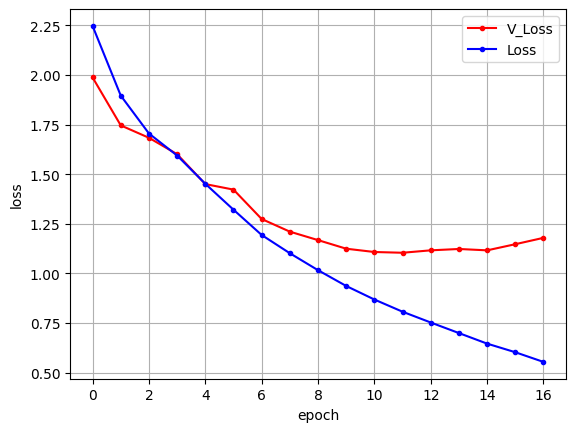

In [11]:
# show result with graph
v_loss = history.history['val_loss']
loss = history.history['loss']

g_x_len = np.arange(len(v_loss))

plt.plot(g_x_len, v_loss, marker='.', c='red', label='V_Loss')
plt.plot(g_x_len, loss, marker='.', c='blue', label='Loss')

plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()